In [310]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import csv


In [209]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [81]:
# file with n-gram counts
file1 = "/Users/ishitagopal/Box/SODA_501/Exercise_1/googlebooks-eng-all-1gram-20120701-1"

# file with total counts
file2 = "/Users/ishitagopal/Box/SODA_501/Exercise_1/googlebooks-eng-all-totalcounts-20120701.txt"

In [196]:
### subset data from file1 ###
# Read file1 line by line
# subset the data such that:
# 1) the n-grams are = '1883', '1910' and '1950';
# 2) the year is between 1850 and 2001
# store the rows which staisfy these 2 in conditions in 'subset' as a list of lists

with open(filepath) as infile:
    subset = []
    for line in infile:
        row = line.rstrip('\n').split('\t')
        if (row[0] == '1883' or row[0] =='1910' or row[0] == '1950') and (int(row[1]) in list(range(1850,2001))):
            subset.append(row)


In [281]:
# Make a dataframe using 'subset'
# column name assignment is based on the description on Google Books Ngram Viewer
#(ngram) TAB (year) TAB (match_count) TAB (volume_count) NEWLINE

NGram = pd.DataFrame(columns=['1gram','year','match_count','volume_count'], data = subset)

In [282]:
# Convert all columns to int
NGram.dtypes
NGram = NGram.astype('int')

In [262]:
### Read file2 which has tot_counts data ###
# create a list of lists

with open(file2) as f:
    totcounts = []
    reader=csv.reader(f,delimiter='\t')
    for line in reader:
        for item in line:
            row = item.split(',')
            totcounts.append(row)
        


In [283]:
# totcounts[1:426]

In [284]:
# Create a dataframe for total_counts data stored in 'totcounts' above
# The column names follow the description given on Google Books Ngram Viewer
# One triplet of values (match_count, page_count, volume_count) per year

Totcounts = pd.DataFrame(columns=['year','match_count', 'page_count', 'volume_count'],data=totcounts[1:426])

In [285]:
# Convert all columns to int
Totcounts.dtypes
Totcounts = Totcounts.astype('int')

In [287]:
# Totcounts

In [288]:
# Subset 'Totcounts' such that it only contains information on years between 1850 and 2000
Totcounts_1850_2000 = Totcounts[(Totcounts['year']>=1850) & (Totcounts['year']<=2000)]

In [347]:
#Totcounts_1850_2000

In [291]:
# Creat a different dataframe associated with each of the three 1-grams in question -- '1883', '1910', '1950'
y1883 = NGram[NGram['1gram']==1883]
y1910 = NGram[NGram['1gram']==1910]
y1950 = NGram[NGram['1gram']==1950]

In [290]:
# Checking if subseting is correct
len(Totcounts_1850_2000) == len(NGram)/3


True

In [292]:
# Extract the column match_count from Totcounts_1850_2000
# match_count gives the total number of words in the corpus in a particular year -- this is required to calculate the frequency
tot_match_count=Totcounts_1850_2000.loc[:,'match_count'].tolist()

In [308]:
len(tot_match_count)

151

In [342]:
# attach total match_count to each of three data frames

y1883['tot_match_count']=tot_match_count
y1883['frequency']=(y1883['match_count']/y1883['tot_match_count'])*10000

/Users/ishitagopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ishitagopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [343]:
y1910['tot_match_count']=tot_match_count
y1910['frequency']=(y1910['match_count']/y1910['tot_match_count'])*10000

/Users/ishitagopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ishitagopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [344]:
y1950['tot_match_count']=tot_match_count
y1950['frequency']=(y1950['match_count']/y1950['tot_match_count'])*10000

/Users/ishitagopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ishitagopal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [340]:
# When does 
max(y1883['frequency']) #--> 1884 = 5.301490129098362e-05
max(y1910['frequency']) #--> 1910 = 7.943655202710247e-05
max(y1950['frequency']) #-->  1955= 0.00015321571800165033


0.00015321571800165033

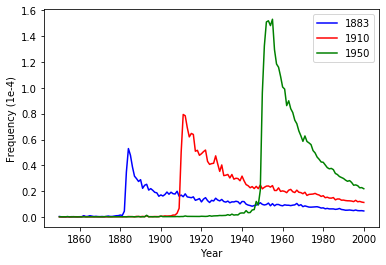

In [346]:
# Plot frequencies 

plt.plot(y1883['year'],y1883['frequency'],color="blue" )
plt.plot(y1910['year'],y1910['frequency'],color="red" )
plt.plot(y1950['year'],y1950['frequency'],color="green" )
plt.legend(['1883', '1910', '1950'], loc='upper right')
plt.xlabel('Year')
plt.ylabel('Frequency (1e-4)')
plt.show()


#### (b) Yes, version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data.
#### (c) Checked my graph against the graph created by the NGram Viewer